[GroupData] Saved: bias_20260102_184830.npy
Deleted old version: bias_20260102_184300.npy


'bias_20260102_184830.npy'

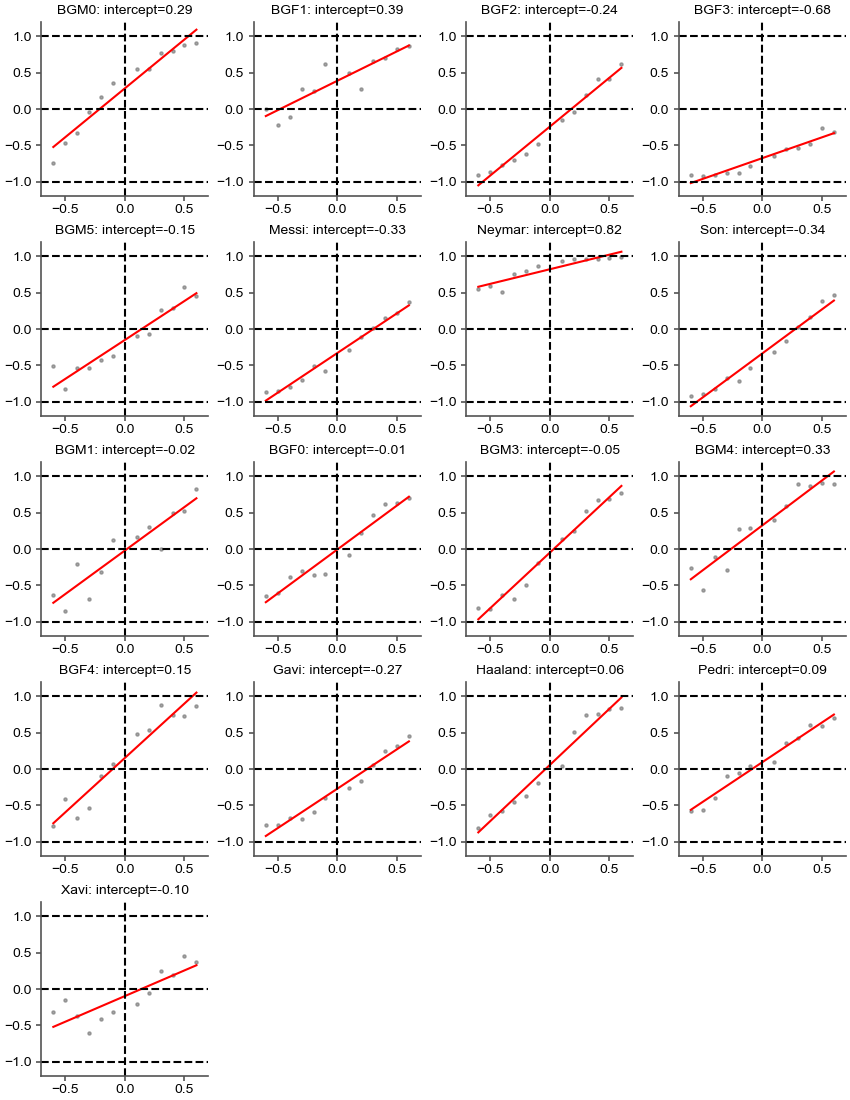

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mab_subjects
from neuropy import plotting


exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

fig = plotting.Fig(5, 4, fontsize=10)

bias_df = []
for e, exp in enumerate(exps):

    task = exp.b2a
    linfit, x, y = task.get_port_bias()

    ax = fig.subplot(fig.gs[e])

    ax.scatter(x, y, s=5, color="gray", alpha=0.7)
    ax.plot(x, linfit.intercept + linfit.slope * x, "-r")
    ax.axhline(0, color="k", linestyle="--")
    ax.axvline(0, color="k", linestyle="--")
    ax.set_title(f"{exp.sub_name}: intercept={linfit.intercept:.2f}")
    ax.set_xlim(-0.7, 0.7)
    ax.set_ylim(-1.2, 1.2)
    ax.axhline(1, color="k", linestyle="--")
    ax.axhline(-1, color="k", linestyle="--")

    df = pd.DataFrame(
        dict(
            sub_name=[exp.sub_name],
            slope=[linfit.slope],
            intercept=[linfit.intercept],
            grp=[exp.group_tag],
        )
    )
    bias_df.append(df)

bias_df = pd.concat(bias_df, ignore_index=True)
mab_subjects.GroupData().save(bias_df, "bias")

(array([2., 2., 2., 2., 0., 1., 2., 2., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1.]),
 array([0.00561618, 0.04651017, 0.08740416, 0.12829816, 0.16919215,
        0.21008615, 0.25098014, 0.29187414, 0.33276813, 0.37366212,
        0.41455612, 0.45545011, 0.49634411, 0.5372381 , 0.5781321 ,
        0.61902609, 0.65992008, 0.70081408, 0.74170807, 0.78260207,
        0.82349606]),
 <BarContainer object of 20 artists>)

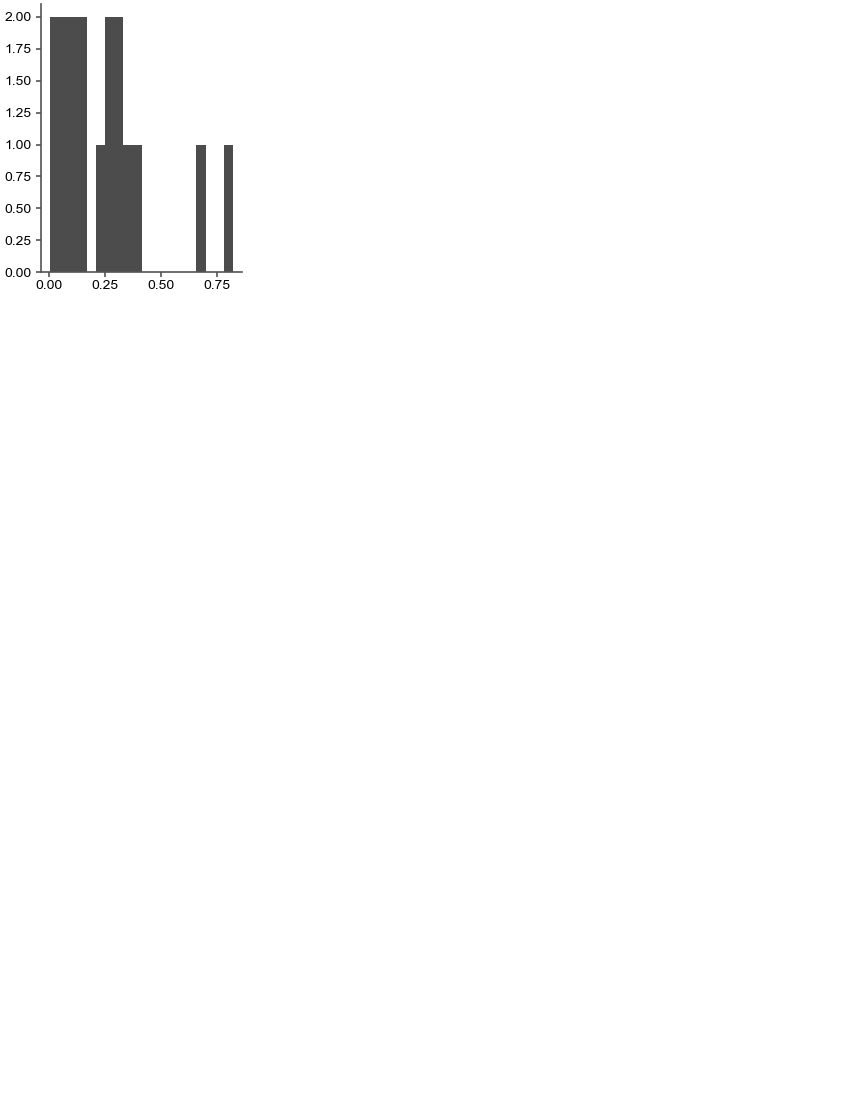

In [74]:
from neuropy import plotting

fig = plotting.Fig(4, 4, fontsize=10)

ax = fig.subplot(fig.gs[0, 0])
# ax.scatter(bias_df["slope"], np.abs(bias_df["intercept"]), c="k", alpha=0.7, s=20)
ax.hist(np.abs(bias_df["intercept"]), bins=20, color="k", alpha=0.7)
# ax.set_xlim(0.5, 1)

In [48]:
linfit

LinregressResult(slope=np.float64(1.3461855765401138), intercept=np.float64(0.28522378086377753), rvalue=np.float64(0.9704509575067383), pvalue=np.float64(1.6883331384510524e-07), stderr=np.float64(0.10584878117742734), intercept_stderr=np.float64(0.0412221778371782))

In [46]:
np.unique(prob_diff)

array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6])